<h1>FAKE NEWS CLASSIFICATION</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.shape

(20800, 5)

In [4]:
data.isnull().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [5]:
data=data.fillna(' ')

In [6]:
data.isnull().any()

id        False
title     False
author    False
text      False
label     False
dtype: bool

1    10413
0    10387
Name: label, dtype: int64

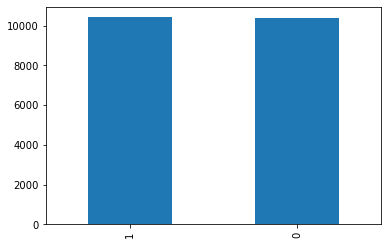

In [7]:
data['label'].value_counts().plot.bar()
data.label.value_counts()

In [8]:
data['text'] = data['text'].str.lower()

In [9]:
data['length'] = data.text.str.len()
data.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide: we didn’t even see comey’s let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"why the truth might get you fired october 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print \nan iranian woman has been sentenced to...,1,938


In [10]:
from nltk.corpus import stopwords

In [11]:
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


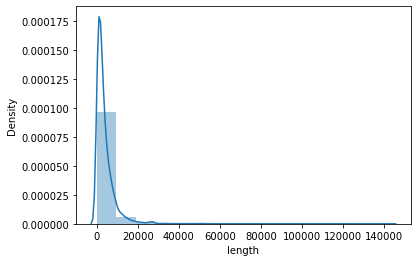

In [12]:
sns.distplot(data[data['label']==1]['length'], bins=15, label = "Fake")

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


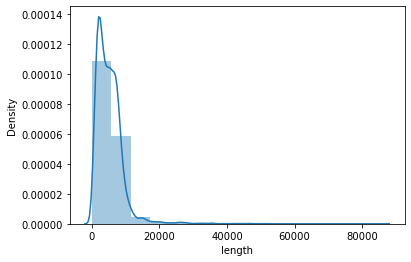

In [13]:
sns.distplot(data[data['label']==0]['length'], bins=15, label = "Not Fake")

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['text']).toarray()
Y = data.iloc[:, -2].values
print(Y)

[1 0 1 ... 0 1 1]


<h2>Train Test Split</h2>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

<h2>Logistic Regression</h2>

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
y_pred = logreg.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1891  155]
 [ 128 1986]]


0.9319711538461538

<h2>SVM</h2>

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train,y_train) 

SVC(kernel='linear', random_state=0)

In [52]:
y_pred_svc = classifier.predict(x_test)

In [53]:
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
accuracy_score(y_test, y_pred_svc)

[[1883  163]
 [ 150 1964]]


0.9247596153846154

<h2>Naive bayes</h2>

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [26]:
y_pred_nb = nb.predict(x_test)

In [27]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
accuracy_score(y_test, y_pred_nb)

[[1841  205]
 [ 338 1776]]


0.8694711538461538

<h2>Passive Aggressive Classifier</h2>

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [29]:
pac=PassiveAggressiveClassifier(max_iter=50)

In [30]:
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [31]:
y_pred_pac = pac.predict(x_test)

In [32]:
cm = confusion_matrix(y_test, y_pred_pac)
print(cm)
accuracy_score(y_test, y_pred_pac)

[[1879  167]
 [ 145 1969]]


0.925

<h2>Testing on Unseen data</h2>

In [33]:
data_test = pd.read_csv('test.csv')
data_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [35]:
data_test.shape

(5200, 4)

In [36]:
data_test['text'] = data_test['text'].str.lower()

In [37]:
data_test['length'] = data_test['text'].str.len()
data_test.head()

,id,title,author,text,length
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"palo alto, calif. — after years of scorning...",8015.0
1,20801,Russian warships ready to strike terrorists ne...,NaN,russian warships ready to strike terrorists ne...,1559.0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,videos #nodapl: native american leaders vow to...,4547.0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"if at first you don’t succeed, try a different...",3578.0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 views 0 comments 0 likes 'for th...,542.0


In [38]:
data_test['text'] = data_test['text'].str.replace(r'\d+(\.\d+)?', 'number')
data_test=data_test.fillna(' ')
data_test.head()

,id,title,author,text,length
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"palo alto, calif. — after years of scorning...",8015
1,20801,Russian warships ready to strike terrorists ne...,,russian warships ready to strike terrorists ne...,1559
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,videos #nodapl: native american leaders vow to...,4547
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"if at first you don’t succeed, try a different...",3578
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,number mins ago number views number comments n...,542


In [39]:
stop_wordst = set(stopwords.words('english'))
data_test['text'] = data_test['text'].apply(lambda y: " ".join(term for term in y.split() if term not in stop_wordst))

In [40]:
data_test.shape

(5200, 5)

In [57]:
cv = CountVectorizer(max_features = 1500)
Xt = cv.fit_transform(data_test['text']).toarray()

In [58]:
Xt.shape

(5200, 1500)

In [59]:
yt_pred = logreg.predict(Xt)
print(yt_pred)

[1 1 0 ... 1 0 1]


In [61]:
yt_pred_svc = classifier.predict(Xt)

In [62]:
my_submission = pd.DataFrame({'Id': data_test.id, 'label': yt_pred_svc})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)